In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#### 7.1 Load and Plot Data

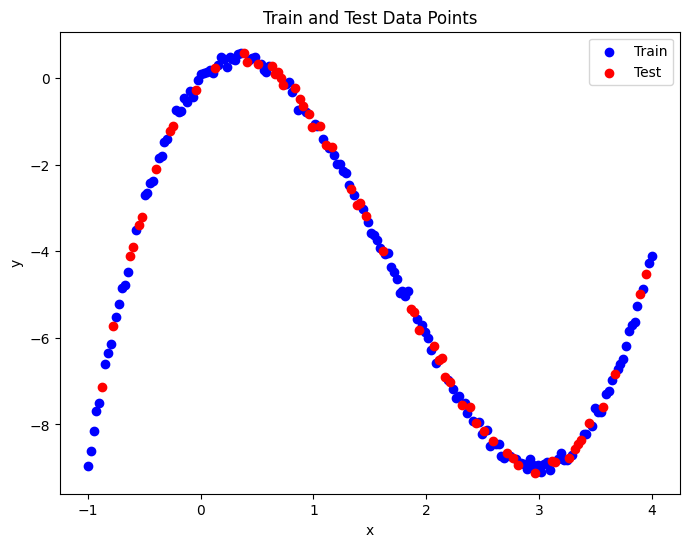

In [2]:
# Load and plot q7-train.csv and q7-test.csv

# Load data
train_df = pd.read_csv('q7-train.csv')
test_df = pd.read_csv('q7-test.csv')

# Extract features and targets
x_train = train_df['x']
y_train = train_df['y']
x_test = test_df['x']
y_test = test_df['y']

# Plot the data
plt.figure(figsize=(8,6))
plt.scatter(x_train, y_train, color='blue', label='Train')
plt.scatter(x_test, y_test, color='red', label='Test')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Train and Test Data Points')
plt.legend()
plt.show()

Model of the form: y = $θ_0$ + $θ_1 x$.

#### 7.2. a Closed-Form Solution

In [3]:
# Construct X matrix (add bias column of 1s) and y vector from training set
X = np.column_stack((np.ones(len(x_train)), x_train))
y = y_train.values.reshape(-1, 1)

print("Sample X Matrix: ", X[:5])
print("Sample Y Matrix: ", y[:5])

Sample X Matrix:  [[ 1.          3.24623116]
 [ 1.          1.43718593]
 [ 1.         -0.22110553]
 [ 1.         -0.69849246]
 [ 1.         -0.12060302]]
Sample Y Matrix:  [[-8.81792555]
 [-3.02134125]
 [-0.73333637]
 [-4.85152845]
 [-0.55837303]]


$$\boldsymbol{\theta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$ where $$\boldsymbol{\theta} = \begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix}$$

In [4]:
def closed_form_solution(X, y):
    """Compute the closed-form solution for linear regression."""
    # w = (X^T * X)^(-1) * X^T * y
    XtX_inv = np.linalg.inv(X.T @ X)
    XtY = X.T @ y
    theta = XtX_inv @ XtY
    return theta

In [5]:
def mse(y_true, y_pred):
    """Calculate Mean Squared Error for predictions"""
    return np.mean((y_true - y_pred) ** 2)

In [6]:
# Closed-form solution: 
theta_cf = closed_form_solution(X, y)
# Extract theta0 and theta1
theta0_cf, theta1_cf = theta_cf.flatten()
print(f"theta0: {theta0_cf:.4f}, theta1: {theta1_cf:.4f}")

theta0: -2.4461, theta1: -1.3619


In [7]:
# Predict on train and test sets
y_pred_train = theta0_cf + theta1_cf * x_train
y_pred_test = theta0_cf + theta1_cf * x_test

# Calculate MSE on train and test sets
mse_train_cf = mse(y_train, y_pred_train)
mse_test_cf = mse(y_test, y_pred_test)

print(f"Train MSE: {mse_train_cf:.4f}")
print(f"Test MSE: {mse_test_cf:.4f}")

# Alternative approach, using matrix multiplication
# X_test = np.column_stack((np.ones(len(x_test)), x_test))
# y_test_vec = y_test.values.reshape(-1, 1)

# y_pred_train = X @ theta
# y_pred_test = X_test @ theta

# mse_train_cf = mse(y, y_pred_train)
# mse_test_cf = mse(y_test_vec, y_pred_test)


Train MSE: 6.9620
Test MSE: 5.8611


#### 2.a CLosed Form Solution Stats
Based on the closed-form solution, the optimal values are:  
$\boldsymbol{\theta}_0$ = -2.4461 (rounded to 4 decimal places)   
$\boldsymbol{\theta}_1$ = -1.3619 (rounded to 4 decimal places)  
MSE on training set: 6.9620 (rounded to 4 decimal places)  
MSE on test set: 5.8611 (rounded to 4 decimal places)  

#### 7.2.b Gradient Descent

$l(\theta) = \|X\theta - y\|^2$ 

The gradient of $l(\theta)$ with respect to $\theta$ is:
$\nabla_{\theta} l(\theta) = 2X^T(X\theta - y)$
Each gradient descent iteration updates $\theta$ as:
$\theta \leftarrow \theta - \eta X^T(X\theta - y)$


In [8]:
def run_gradient_descent(X,y, theta_gd, learning_rate, max_iters=1000, threshold=1e-6):
    """Run Gradient Descent to find and update parameter values until convergence"""
    Xt = X.T

    for i in range(max_iters):
        gradient = 2 * Xt @ (X @ theta_gd - y)
        theta_gd_new = theta_gd - learning_rate * gradient
        # Check for convergence
        if np.linalg.norm(theta_gd_new - theta_gd) < threshold:
            break
        theta_gd = theta_gd_new

    return theta_gd,i


In [9]:
# Gradient Descent for Linear Regression
np.random.seed(42)

# Initialize theta (2x1 vector: [theta0, theta1])
theta_gd = np.zeros((2,1))
learning_rate = 1e-3
max_iters = 1000
threshold = 1e-6

theta_gd,i = run_gradient_descent(X,y,theta_gd,learning_rate,max_iters, threshold)

# Extract theta0 and theta1
theta0_gd, theta1_gd = theta_gd.flatten()
print(f"[GD] theta0: {theta0_gd:.4f}, theta1: {theta1_gd:.4f}, iterations: {i+1}")

[GD] theta0: -2.4461, theta1: -1.3619, iterations: 93


In [10]:
# Predict on train and test sets
y_pred_train_gd = theta0_gd + theta1_gd * x_train
y_pred_test_gd = theta0_gd + theta1_gd * x_test

mse_train_gd = mse(y_train, y_pred_train_gd)
mse_test_gd = mse(y_test, y_pred_test_gd)

print(f"[GD] Train MSE: {mse_train_gd:.4f}")
print(f"[GD] Test MSE: {mse_test_gd:.4f}")

[GD] Train MSE: 6.9620
[GD] Test MSE: 5.8611


#### 2.b Gradient Descent Analysis
Initial run gave overflow error and NaN values for theta parameters, which suggested that the gradient was diverging due to large learning rate. Decreasing the learning rate helped curb that issue.
Based on the gradient descent solution, the optimal values are:   
$\boldsymbol{\theta}_0$ = -2.4461 (rounded to 4 decimal places)  
$\boldsymbol{\theta}_1$ = -1.3619 (rounded to 4 decimal places)   
MSE on training set: 6.9620 (rounded to 4 decimal places)  
MSE on test set: 5.8611 (rounded to 4 decimal places)   

In [11]:
# theta_cfand theta_gd are 2x1 arrays
def compare_values(theta_cf, theta_gd, mse_train_cf, mse_train_gd, mse_test_cf, mse_test_gd):
    diff = theta_gd.flatten() - theta_cf.flatten()
    print("theta difference:", diff)
    print("L2 norm difference:", np.linalg.norm(diff))
    print("relative difference:", np.linalg.norm(diff) / (np.linalg.norm(theta_cf) + 1e-12))

    # MSE differences
    mse_diff_train = mse_train_gd - mse_train_cf
    mse_diff_test  = mse_test_gd  - mse_test_cf
    print("MSE diff (train):", mse_diff_train)
    print("MSE diff (test):", mse_diff_test)

In [12]:
compare_values(theta_cf, theta_gd, mse_train_cf, mse_train_gd, mse_test_cf, mse_test_gd)

theta difference: [ 7.23009637e-06 -2.69443028e-06]
L2 norm difference: 7.715843964842476e-06
relative difference: 2.7559525909112712e-06
MSE diff (train): 2.6749269466108672e-11
MSE diff (test): -4.855979693019208e-06


#### 7.2.c Plotting Regression Solutions

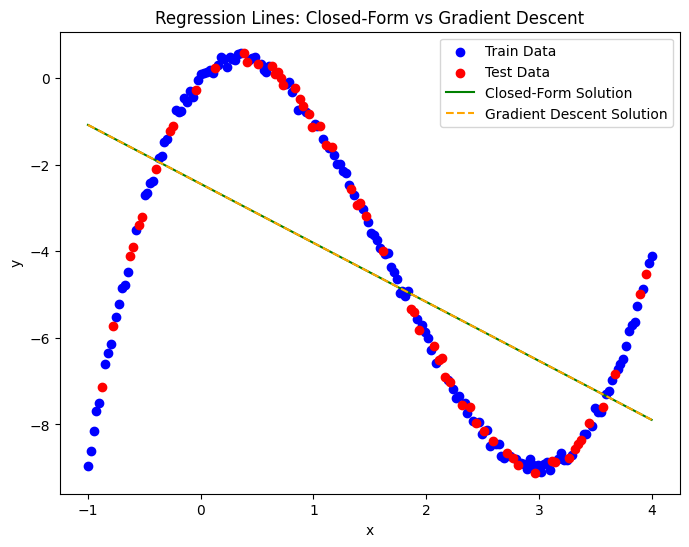

In [13]:
# Plot data and regression lines for both methods
plt.figure(figsize=(8,6))

# Scatter plot for train and test data
plt.scatter(x_train, y_train, color='blue', label='Train Data')
plt.scatter(x_test, y_test, color='red', label='Test Data')

# Line for closed-form solution
x_line = np.linspace(min(x_train.min(), x_test.min()), max(x_train.max(), x_test.max()), 100)
y_line_cf = theta0_cf + theta1_cf * x_line
plt.plot(x_line, y_line_cf, color='green', linestyle='-', label='Closed-Form Solution')

# Line for gradient descent solution
y_line_gd = theta0_gd + theta1_gd * x_line
plt.plot(x_line, y_line_gd, color='orange', linestyle='--', label='Gradient Descent Solution')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Lines: Closed-Form vs Gradient Descent')
plt.legend()
plt.show()

#### 7.3 Linear Regression on a Quadratic Model

In [14]:
# Quadratic model: y = θ0 + θ1 x + θ2 x^2 (Closed-form solution)
# Construct X matrix for quadratic model
X_quad = np.column_stack((np.ones(len(x_train)), x_train, x_train**2))
y_quad = y_train.values.reshape(-1, 1)

theta_cf_quad = closed_form_solution(X_quad,y_quad)

# Extract theta0, theta1, theta2
theta0_quad_cf, theta1_quad_cf, theta2_quad_cf = theta_cf_quad.flatten()
print(f"[Closed Form Quadratic] theta0: {theta0_quad_cf:.4f}, theta1: {theta1_quad_cf:.4f}, theta2: {theta2_quad_cf:.4f}")

# Predict on train and test sets
y_pred_train_quad = theta0_quad_cf + theta1_quad_cf * x_train + theta2_quad_cf * x_train**2
y_pred_test_quad = theta0_quad_cf + theta1_quad_cf * x_test + theta2_quad_cf * x_test**2

# Calculate MSE for train and test sets
mse_train_cf_quad = mse(y_train, y_pred_train_quad)
mse_test_cf_quad = mse(y_test, y_pred_test_quad)

print(f"[Closed Form Quadratic] Train MSE: {mse_train_cf_quad:.4f}")
print(f"[Closed Form Quadratic] Test MSE: {mse_test_cf_quad:.4f}")

[Closed Form Quadratic] theta0: -2.4456, theta1: 0.1287, theta2: -0.4991
[Closed Form Quadratic] Train MSE: 6.0457
[Closed Form Quadratic] Test MSE: 5.0148


In [15]:
# Gradient Descent for Quadratic Model using the same run_gradient_descent function
# Prepare data for quadratic model
X_quad = np.column_stack((np.ones(len(x_train)), x_train, x_train**2))
y_quad = y_train.values.reshape(-1, 1)

theta_gd_quad = np.zeros((3,1))
learning_rate = 1e-4
max_iters = 10000
threshold = 1e-6

theta_gd_quad, iters = run_gradient_descent(X_quad, y_quad, theta_gd_quad, learning_rate, max_iters, threshold)

theta0_gd_quad, theta1_gd_quad, theta2_gd_quad = theta_gd_quad.flatten()
print(f"[GD-Quadratic] theta0: {theta0_gd_quad:.4f}, theta1: {theta1_gd_quad:.4f}, theta2: {theta2_gd_quad:.4f}, iterations: {iters+1}")

# Predict on train and test sets
y_pred_train_gd_quad = theta0_gd_quad + theta1_gd_quad * x_train + theta2_gd_quad * x_train**2
y_pred_test_gd_quad = theta0_gd_quad + theta1_gd_quad * x_test + theta2_gd_quad * x_test**2

mse_train_gd_quad = mse(y_train, y_pred_train_gd_quad)
mse_test_gd_quad = mse(y_test, y_pred_test_gd_quad)

print(f"[GD-Quadratic] Train MSE: {mse_train_gd_quad:.4f}")
print(f"[GD-Quadratic] Test MSE: {mse_test_gd_quad:.4f}")

[GD-Quadratic] theta0: -2.4455, theta1: 0.1286, theta2: -0.4991, iterations: 1115
[GD-Quadratic] Train MSE: 6.0457
[GD-Quadratic] Test MSE: 5.0148


In [16]:
compare_values(theta_cf_quad, theta_gd_quad, mse_train_cf_quad, mse_train_gd_quad, mse_test_cf_quad, mse_test_gd_quad)

theta difference: [ 4.99716630e-05 -1.06819021e-04  2.77742143e-05]
L2 norm difference: 0.00012115641668485732
relative difference: 4.8476599776236206e-05
MSE diff (train): 4.325894309431533e-09
MSE diff (test): -2.7716230618146653e-05


#### 7.3 Discussion
[Closed Form Quadratic] $\boldsymbol{\theta}_0$ : -2.4456, $\boldsymbol{\theta}_1$ : 0.1287, $\boldsymbol{\theta}_2$ : -0.4991  

[Closed Form Quadratic] Train MSE: 6.0457  
[Closed Form Quadratic] Test MSE: 5.0148    

[GD-Quadratic] $\boldsymbol{\theta}_0$: -2.4455, $\boldsymbol{\theta}_1$: 0.1286, $\boldsymbol{\theta}_2$: -0.4991, iterations: 1115  

[GD-Quadratic] Train MSE: 6.0457  
[GD-Quadratic] Test MSE: 5.0148  

theta difference: [ 4.99716630e-05 -1.06819021e-04  2.77742143e-05]  
L2 norm difference: 0.00012115641668485732  
relative difference: 4.8476599776236206e-05  


MSE diff (train): 4.325894309431533e-09  
MSE diff (test): -2.7716230618146653e-05  


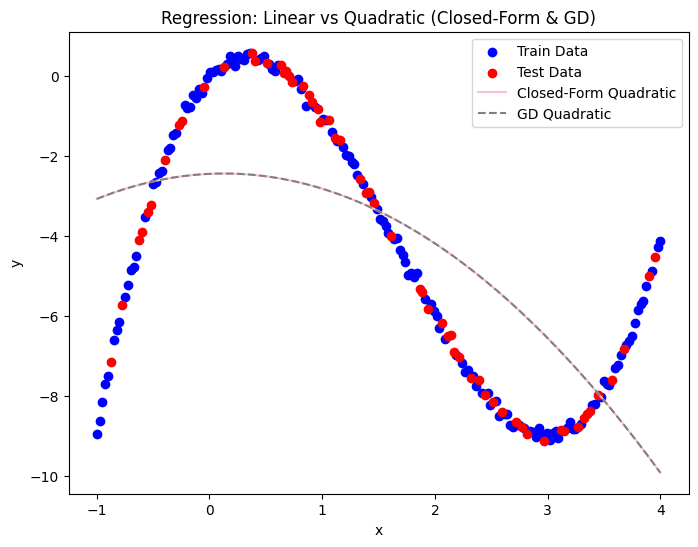

In [17]:
# Plot data and regression lines for both methods (linear and quadratic)
plt.figure(figsize=(8,6))

# Scatter plot for train and test data
plt.scatter(x_train, y_train, color='blue', label='Train Data')
plt.scatter(x_test, y_test, color='red', label='Test Data')

# # Linear regression lines
# x_line = np.linspace(min(x_train.min(), x_test.min()), max(x_train.max(), x_test.max()), 100)
# y_line_cf = theta0_cf + theta1_cf * x_line
# plt.plot(x_line, y_line_cf, color='green', linestyle='-', label='Closed-Form Linear')
# y_line_gd = theta0_gd + theta1_gd * x_line
# plt.plot(x_line, y_line_gd, color='orange', linestyle='--', label='GD Linear')

# Quadratic regression curves
x_curve = np.linspace(min(x_train.min(), x_test.min()), max(x_train.max(), x_test.max()), 200)
y_curve_cf = theta0_quad_cf + theta1_quad_cf * x_curve + theta2_quad_cf * x_curve**2
y_curve_gd = theta0_gd_quad + theta1_gd_quad * x_curve + theta2_gd_quad * x_curve**2
plt.plot(x_curve, y_curve_cf, color='pink', linestyle='-', label='Closed-Form Quadratic')
plt.plot(x_curve, y_curve_gd, color='gray', linestyle='--', label='GD Quadratic')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression: Linear vs Quadratic (Closed-Form & GD)')
plt.legend()
plt.show()

#### 7.4 Linear Regression on a Cubic Model

In [18]:
# Cubic model: y = θ0 + θ1 x + θ2 x^2 + θ3 x^3 (Closed-form solution)
# Construct X matrix for cubic model
X_cubic = np.column_stack((np.ones(len(x_train)), x_train, x_train**2, x_train**3))
y_cubic = y_train.values.reshape(-1, 1)

theta_cf_cubic = closed_form_solution(X_cubic, y_cubic)

theta0_cubic_cf, theta1_cubic_cf, theta2_cubic_cf, theta3_cubic_cf = theta_cf_cubic.flatten()
print(f"[Closed-form Cubic] theta0: {theta0_cubic_cf:.4f}, theta1: {theta1_cubic_cf:.4f}, theta2: {theta2_cubic_cf:.4f}, theta3: {theta3_cubic_cf:.4f}")

# Predict on train and test sets
y_pred_train_cubic = theta0_cubic_cf + theta1_cubic_cf * x_train + theta2_cubic_cf * x_train**2 + theta3_cubic_cf * x_train**3
y_pred_test_cubic = theta0_cubic_cf + theta1_cubic_cf * x_test + theta2_cubic_cf * x_test**2 + theta3_cubic_cf * x_test**3

# Calculate MSE for train and test sets
mse_train_cf_cubic = mse(y_train, y_pred_train_cubic)
mse_test_cf_cubic = mse(y_test, y_pred_test_cubic)

print(f"[Closed-form Cubic] Train MSE: {mse_train_cf_cubic:.4f}")
print(f"[Closed-form Cubic] Test MSE: {mse_test_cf_cubic:.4f}")

[Closed-form Cubic] theta0: -0.0181, theta1: 2.9846, theta2: -4.9782, theta3: 0.9954
[Closed-form Cubic] Train MSE: 0.0088
[Closed-form Cubic] Test MSE: 0.0080


In [19]:
# Gradient Descent for Cubic Model using the same run_gradient_descent function
X_cubic = np.column_stack((np.ones(len(x_train)), x_train, x_train**2, x_train**3))
y_cubic = y_train.values.reshape(-1, 1)

theta_gd_cubic = np.zeros((4,1))
learning_rate = 1e-5
max_iters = 10000
threshold = 1e-6

theta_gd_cubic, iters = run_gradient_descent(X_cubic, y_cubic, theta_gd_cubic, learning_rate, max_iters, threshold)

theta0_gd_cubic, theta1_gd_cubic, theta2_gd_cubic, theta3_gd_cubic = theta_gd_cubic.flatten()
print(f"[GD-Cubic] theta0: {theta0_gd_cubic:.4f}, theta1: {theta1_gd_cubic:.4f}, theta2: {theta2_gd_cubic:.4f}, theta3: {theta3_gd_cubic:.4f}, iterations: {iters+1}")

# Predict on train and test sets
y_pred_train_gd_cubic = theta0_gd_cubic + theta1_gd_cubic * x_train + theta2_gd_cubic * x_train**2 + theta3_gd_cubic * x_train**3
y_pred_test_gd_cubic = theta0_gd_cubic + theta1_gd_cubic * x_test + theta2_gd_cubic * x_test**2 + theta3_gd_cubic * x_test**3

mse_train_gd_cubic = mse(y_train, y_pred_train_gd_cubic)
mse_test_gd_cubic = mse(y_test, y_pred_test_gd_cubic)

print(f"[GD-Cubic] Train MSE: {mse_train_gd_cubic:.4f}")
print(f"[GD-Cubic] Test MSE: {mse_test_gd_cubic:.4f}")

[GD-Cubic] theta0: -0.0628, theta1: 2.8987, theta2: -4.8910, theta3: 0.9788, iterations: 10000
[GD-Cubic] Train MSE: 0.0111
[GD-Cubic] Test MSE: 0.0115


In [20]:
compare_values(theta_cf_cubic, theta_gd_cubic, mse_train_cf_cubic, mse_train_gd_cubic, mse_test_cf_cubic, mse_test_gd_cubic)

theta difference: [-0.04473305 -0.08591811  0.08722987 -0.01663108]
L2 norm difference: 0.13141008110509933
relative difference: 0.022314151103569334
MSE diff (train): 0.002288422615401846
MSE diff (test): 0.0034865284443234574


### 7.4 Discussion
[Closed-form Cubic]  $\boldsymbol{\theta}_0$: -0.0181,  $\boldsymbol{\theta}_1$: 2.9846,  $\boldsymbol{\theta}_2$: -4.9782,  $\boldsymbol{\theta}_3$: 0.9954  
[Closed-form Cubic] Train MSE: 0.0088  
[Closed-form Cubic] Test MSE: 0.0080  

[GD-Cubic]  $\boldsymbol{\theta}_0$: -0.0628,  $\boldsymbol{\theta}_1$: 2.8987,  $\boldsymbol{\theta}_2$: -4.8910,  $\boldsymbol{\theta}_3$: 0.9788, iterations: 10000  
[GD-Cubic] Train MSE: 0.0111  
[GD-Cubic] Test MSE: 0.0115  

theta difference: [-0.04473305 -0.08591811  0.08722987 -0.01663108]  
L2 norm difference: 0.13141008110509933  
relative difference: 0.022314151103569334  

MSE diff (train): 0.002288422615401846  
MSE diff (test): 0.0034865284443234574  

Closed-form θ: [-0.01809716  2.98461213 -4.97818731  0.99539667]
GD θ: [-0.06283022  2.89869403 -4.89095745  0.97876559]
Closed-form MSE (train): 0.0088, (test): 0.0080
GD MSE (train): 0.0111, (test): 0.0115


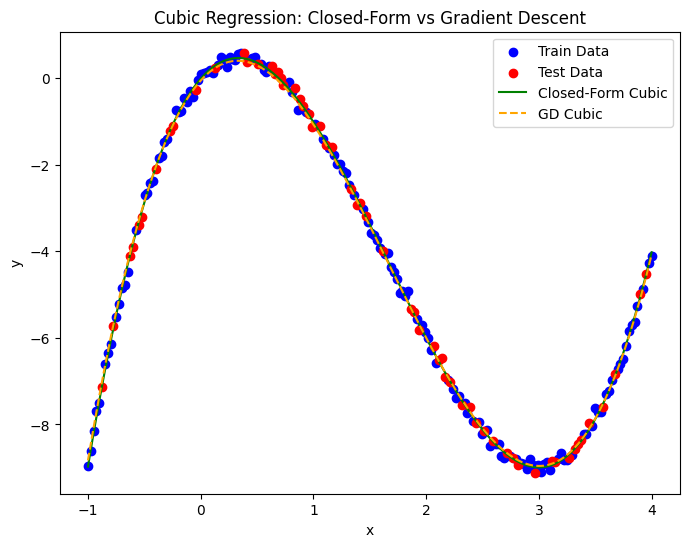

In [21]:
# Compare theta values and MSEs for cubic model
print("Closed-form θ:", theta_cf_cubic.flatten())
print("GD θ:", theta_gd_cubic.flatten())
print(f"Closed-form MSE (train): {mse_train_cf_cubic:.4f}, (test): {mse_test_cf_cubic:.4f}")
print(f"GD MSE (train): {mse_train_gd_cubic:.4f}, (test): {mse_test_gd_cubic:.4f}")

# Plot data and cubic fits from both methods
plt.figure(figsize=(8,6))
plt.scatter(x_train, y_train, color='blue', label='Train Data')
plt.scatter(x_test, y_test, color='red', label='Test Data')

x_cubic_curve = np.linspace(min(x_train.min(), x_test.min()), max(x_train.max(), x_test.max()), 200)
y_cubic_curve_cf = theta0_cubic_cf + theta1_cubic_cf * x_cubic_curve + theta2_cubic_cf * x_cubic_curve**2 + theta3_cubic_cf * x_cubic_curve**3
y_cubic_curve_gd = theta0_gd_cubic + theta1_gd_cubic * x_cubic_curve + theta2_gd_cubic * x_cubic_curve**2 + theta3_gd_cubic * x_cubic_curve**3
plt.plot(x_cubic_curve, y_cubic_curve_cf, color='green', linestyle='-', label='Closed-Form Cubic')
plt.plot(x_cubic_curve, y_cubic_curve_gd, color='orange', linestyle='--', label='GD Cubic')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Regression: Closed-Form vs Gradient Descent')
plt.legend()
plt.show()

## 8. Linear Regression to analyze correlation for wine features and quality

### 8.1 Load Data

In [22]:
# Load q8-train.csv, q8-val.csv, q8-test.csv and extract features/target
# Load data
train_data = pd.read_csv('q8-train.csv')
val_data = pd.read_csv('q8-val.csv')
test_data = pd.read_csv('q8-test.csv')

target_column = 'quality'

# Split features and target
X_train = train_data.drop(columns=[target_column])
y_train = train_data[target_column]

X_val = val_data.drop(columns=[target_column])
y_val = val_data[target_column]

X_test = test_data.drop(columns=[target_column])
y_test = test_data[target_column]

print('Train shape:', X_train.shape, y_train.shape)
print('Validation shape:', X_val.shape, y_val.shape)
print('Test shape:', X_test.shape, y_test.shape)

Train shape: (959, 12) (959,)
Validation shape: (400, 12) (400,)
Test shape: (240, 12) (240,)


#### 8.2 Training Linear Regressor

In [23]:
def train_linear_regression(X_train, y_train, X_val, y_val, degree):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)

    # Transform features
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    # Train linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on train, val, test
    y_pred_train = model.predict(X_train_poly)
    y_pred_val = model.predict(X_val_poly)

    # Compute MSE
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_val = mean_squared_error(y_val, y_pred_val)

    print(f"Train MSE: {mse_train:.4f}")
    print(f"Validation MSE: {mse_val:.4f}")

    return X_train_poly, X_val_poly, y_pred_train, y_pred_val, poly


#### Using linear features

In [24]:
degree = 1  # linear
X_train_linear, X_val_linear, y_pred_train_linear, y_pred_val_linear,_ = train_linear_regression(X_train, y_train, X_val, y_val, degree)

Train MSE: 0.4018
Validation MSE: 0.4063


#### Using cubic features

In [25]:
degree = 3  # cubic
X_train_cubic, X_val_cubic, y_pred_train_cubic, y_pred_val_cubic, _ = train_linear_regression(X_train, y_train, X_val, y_val, degree)

Train MSE: 0.1733
Validation MSE: 3.0961


#### Using quadratic features

In [26]:
degree = 2  # quadratic (to be used)
X_train_poly, X_val_poly, y_pred_train, y_pred_val, poly = train_linear_regression(X_train, y_train, X_val, y_val, degree)

Train MSE: 0.3305
Validation MSE: 0.4130


### 8.3 Evaluating Models

In [27]:
# Display MSE comparison as a pandas DataFrame
# reusing function calcuate mse from 7.1
data = {
    'Model': ['Linear', 'Quadratic', 'Cubic'],
    'Train MSE': [mse(y_train, y_pred_train_linear), mse(y_train, y_pred_train), mse(y_train, y_pred_train_cubic)],
    'Validation MSE': [mse(y_val, y_pred_val_linear), mse(y_val, y_pred_val), mse(y_val, y_pred_val_cubic)]
}
mse_df = pd.DataFrame(data)
display(mse_df) 

,Model,Train MSE,Validation MSE
0,Linear,0.401759,0.406257
1,Quadratic,0.330480,0.412984
2,Cubic,0.173259,3.096138


### 8.4 L2 Regularization: Ridge Regression to fix overfitting

In [28]:
# Train Ridge regression with L2 regularization and compare validation errors
from sklearn.linear_model import Ridge

# alphas = [0.001, 0.1, 1, 10, 50, 75, 100, 250, 300, 500, 750, 1000]
alphas = [0.001, 0.1, 1, 8, 10, 25, 50, 75, 100, 250, 260, 275, 280, 300, 350, 500, 750, 1000, 1500]
results = []
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_poly, y_train)

    y_pred_train_ridge = ridge_model.predict(X_train_poly)
    y_pred_val_ridge = ridge_model.predict(X_val_poly)

    train_mse = mse(y_train, y_pred_train_ridge)
    val_mse = mse(y_val, y_pred_val_ridge)
    results.append({'alpha': alpha, 'Train MSE': train_mse, 'Validation MSE': val_mse})

ridge_df = pd.DataFrame(results)
display(ridge_df)

c:\Users\shree\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.08097e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\shree\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=7.74956e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


,alpha,Train MSE,Validation MSE
0,0.001,0.340193,0.404614
1,0.100,0.346472,0.402224
2,1.000,0.352262,0.400351
3,8.000,0.359463,0.393523
4,10.000,0.360764,0.392847
5,25.000,0.367452,0.391268
6,50.000,0.373349,0.391129
7,75.000,0.376922,0.391197
8,100.000,0.379497,0.391229
9,250.000,0.388056,0.391016


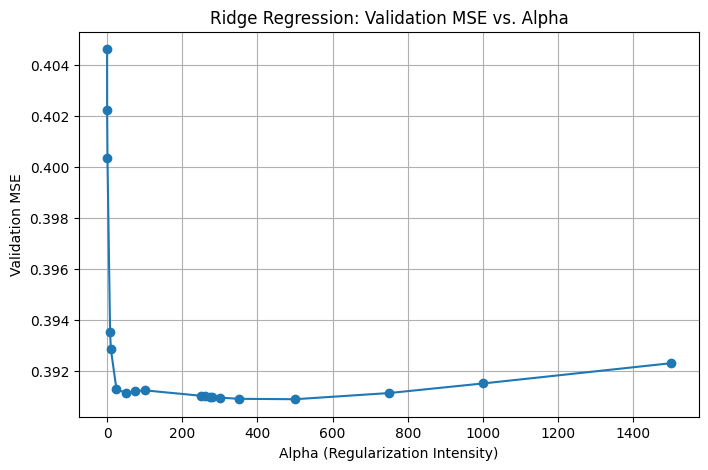

In [29]:
# Plot alpha values vs. validation MSE for Ridge regression
plt.figure(figsize=(8,5))
plt.plot(ridge_df['alpha'], ridge_df['Validation MSE'], marker='o')
plt.xlabel('Alpha (Regularization Intensity)')
plt.ylabel('Validation MSE')
plt.title('Ridge Regression: Validation MSE vs. Alpha')
plt.grid(True)
plt.show()

As we see, the validation error drops from 0.40 to 0.392 as alpha is increased from 0 to 200. After that, it stays roughly the same for an interval and starts increasing as the alpha value gets greater than 500. An optimal alpha would be somewhere between 10 and 500. We'll take the value 50 (0.391129) for our testing.

### 8.5 Model Testing

In [30]:
# Use optimal alpha (50) for Ridge regression and evaluate on test set
optimal_alpha = 50
optimal_ridge = Ridge(alpha=optimal_alpha)
optimal_ridge.fit(X_train_poly, y_train)
X_test_poly = poly.transform(X_test)
y_pred_test_best = optimal_ridge.predict(X_test_poly)
test_mse_best = mse(y_test, y_pred_test_best)
print(f"Optimal Ridge alpha: {optimal_alpha}")
print(f"Test MSE (Optimal Ridge): {test_mse_best:.4f}")

Optimal Ridge alpha: 50
Test MSE (Optimal Ridge): 0.4819


The test set has an MSE of 0.4819, when alpha = 50.